In [204]:
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [205]:
# Using file agaricus-lepiota which is DATA file.
# renaming the file to agaricus-lepiota.csv and adding 23 headers.
# of which are 22 attributes with from 2 to 22 and first one being class with values edible=e, poisonous=p

df=pd.read_csv('agaricus-lepiota.csv',names=['class','capShape','capSurface','capColor','bruises','odor','gillAttachment','gillSpacing','gillSize','gillColor','stalkShape','stalkRoot','stalkSurfaceAboveRing','stalkSurfaceBelowRing','stalkColorAboveRing','stalkColorBelowRing','veilType','veilColor','ringNumber','ringType','sporePrintColor','population','habitat'])
#df=pd.read_csv('agaricus-lepiota.csv')
df

,class,capShape,capSurface,capColor,bruises,odor,gillAttachment,gillSpacing,gillSize,gillColor,...,stalkSurfaceBelowRing,stalkColorAboveRing,stalkColorBelowRing,veilType,veilColor,ringNumber,ringType,sporePrintColor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [206]:
# checking Shape
df.shape

(8124, 23)

In [207]:
# checking col datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   class                  8124 non-null   object
 1   capShape               8124 non-null   object
 2   capSurface             8124 non-null   object
 3   capColor               8124 non-null   object
 4   bruises                8124 non-null   object
 5   odor                   8124 non-null   object
 6   gillAttachment         8124 non-null   object
 7   gillSpacing            8124 non-null   object
 8   gillSize               8124 non-null   object
 9   gillColor              8124 non-null   object
 10  stalkShape             8124 non-null   object
 11  stalkRoot              8124 non-null   object
 12  stalkSurfaceAboveRing  8124 non-null   object
 13  stalkSurfaceBelowRing  8124 non-null   object
 14  stalkColorAboveRing    8124 non-null   object
 15  stalkColorBelowRing  

In [208]:
# Checking for null values 
df.isnull()

,class,capShape,capSurface,capColor,bruises,odor,gillAttachment,gillSpacing,gillSize,gillColor,...,stalkSurfaceBelowRing,stalkColorAboveRing,stalkColorBelowRing,veilType,veilColor,ringNumber,ringType,sporePrintColor,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


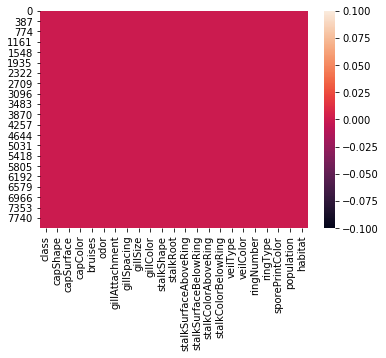

In [209]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [210]:
# data is categorial so converting it with LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
    
df

,class,capShape,capSurface,capColor,bruises,odor,gillAttachment,gillSpacing,gillSize,gillColor,...,stalkSurfaceBelowRing,stalkColorAboveRing,stalkColorBelowRing,veilType,veilColor,ringNumber,ringType,sporePrintColor,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [211]:
#Setting x
x=df.drop(['class'],axis=1)
x

,capShape,capSurface,capColor,bruises,odor,gillAttachment,gillSpacing,gillSize,gillColor,stalkShape,...,stalkSurfaceBelowRing,stalkColorAboveRing,stalkColorBelowRing,veilType,veilColor,ringNumber,ringType,sporePrintColor,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [212]:
#Describe
df.describe()

,class,capShape,capSurface,capColor,bruises,odor,gillAttachment,gillSpacing,gillSize,gillColor,...,stalkSurfaceBelowRing,stalkColorAboveRing,stalkColorBelowRing,veilType,veilColor,ringNumber,ringType,sporePrintColor,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [213]:
# Setting y
y=df.drop(df.loc[:,'capShape':'habitat'], axis=1)
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [214]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [215]:
x=scale.fit_transform(x)

In [216]:

max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.10,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)

Accuracy_Score corresponding to r_state:  42  is  0.9544895448954489
Accuracy_Score corresponding to r_state:  43  is  0.9618696186961869
Accuracy_Score corresponding to r_state:  44  is  0.968019680196802
Accuracy_Score corresponding to r_state:  45  is  0.9606396063960639
Accuracy_Score corresponding to r_state:  46  is  0.9606396063960639
Accuracy_Score corresponding to r_state:  47  is  0.9606396063960639
Accuracy_Score corresponding to r_state:  48  is  0.968019680196802
Accuracy_Score corresponding to r_state:  49  is  0.9520295202952029
Accuracy_Score corresponding to r_state:  50  is  0.942189421894219
Accuracy_Score corresponding to r_state:  51  is  0.9630996309963099
Accuracy_Score corresponding to r_state:  52  is  0.9544895448954489
Accuracy_Score corresponding to r_state:  53  is  0.964329643296433
Accuracy_Score corresponding to r_state:  54  is  0.956949569495695
Accuracy_Score corresponding to r_state:  55  is  0.958179581795818
Accuracy_Score corresponding to r_state:

In [217]:
# Setting the test x & y values
# Setting the train x & y values
# Using test size of 500
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.10,random_state=62)

In [218]:
train_x.shape

(7311, 22)

In [219]:
train_y.shape

(7311, 1)

In [220]:
test_x.shape

(813, 22)

In [221]:
test_y.shape

(813, 1)

In [222]:
test_y

,class
6336,1
3316,0
2189,0
4292,1
4583,1
...,...
3588,0
3157,0
4133,1
6438,1


In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [224]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [225]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [226]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [227]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    print("\n")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,threshold=roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score= ",roc_auc)
    rocscore.append(roc_auc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n\n")

-------------- KNeighborsClassifier --------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Accuracy Score:  1.0
Cross_Val_Score:  0.9504082368409892
roc_auc_score=  1.0
[[420   0]
 [  0 393]]



-------------- SVC --------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score:  1.0
Cross_Val_Score:  0.9580437048212846
roc_auc_score=  1.0
[[420   0]
 [  0 393]]



-------------- LogisticRegression --------------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
   

In [228]:
result=pd.DataFrame({"Model": Model, "Accuracy_Score": score,"Cross_Val_Score":cvs,"ROC_Auc_Curve":rocscore})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,100.000000,95.040824,100.000000
1,SVC,100.000000,95.804370,100.000000
2,LogisticRegression,97.047970,88.750295,97.052890
3,DecisionTreeClassifier,100.000000,96.112252,100.000000
4,GaussianNB,94.341943,84.638601,94.360233


# I choose DecisionTreeClassifier Model based on the stats above.

In [229]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(lg,"lg_mushroom.pkl")

['lg_mushroom.pkl']